In [10]:
import scipy 
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("heart.csv")
X = data.drop('target',axis=1)
y = data['target']

In [32]:
# pipeline for numerical data
numeric_pipe = Pipeline(steps=[
    ("missing steps",SimpleImputer(strategy='mean')),
    ("scaling", MinMaxScaler()),
    ("normalization", PowerTransformer())
])
numeric_fit_result = numeric_pipe.fit(data).transform(data).shape

In [13]:
# pipeline for categorical data
categoric_pipe = Pipeline(steps=[
    ("missing steps",SimpleImputer(strategy='most_frequent')),
    ("scaling", MinMaxScaler())
])
categorical_fit_result = categoric_pipe.fit(data).transform(data).shape

In [18]:
column_names = np.array(data.columns)
column_names= column_names[:-1]

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

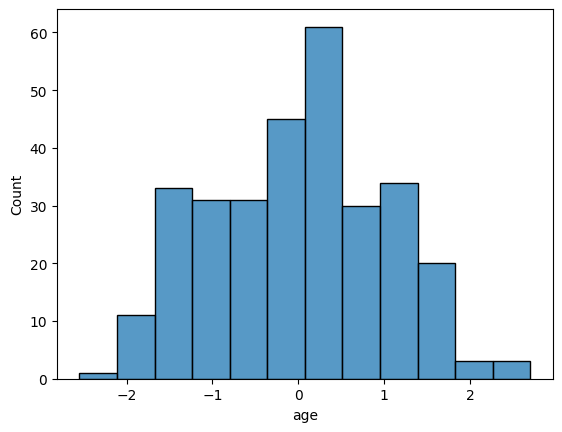

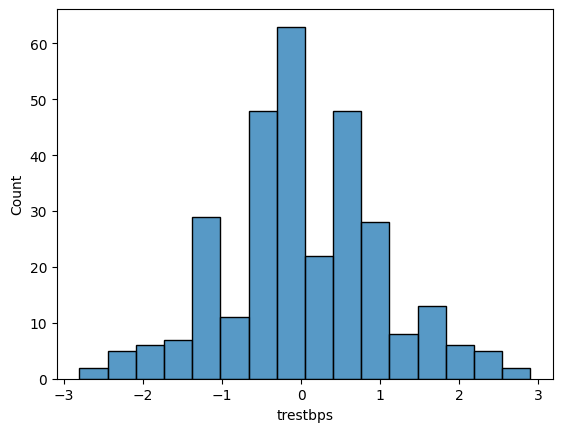

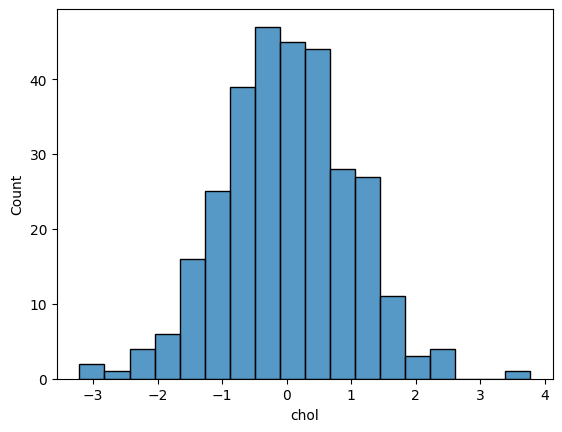

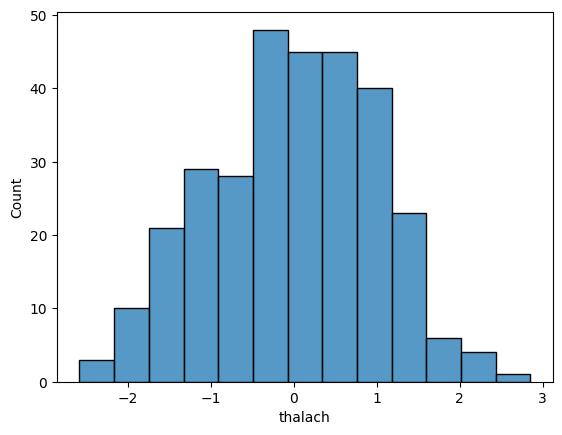

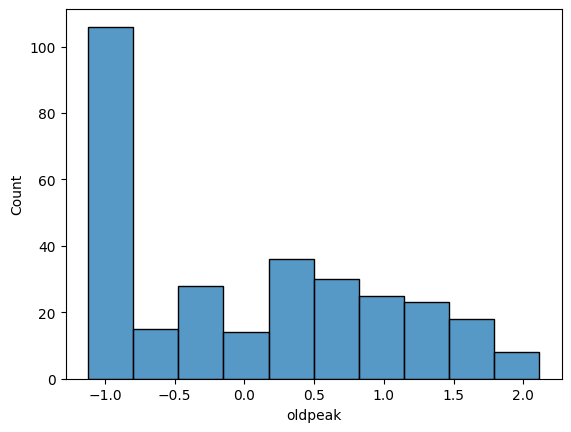

In [33]:
# transformation pipeline for numerical data
numerical_transformed = pd.DataFrame(data = numeric_pipe.fit_transform(data[numerical_cols]), columns=numerical_cols)
for feature in numerical_transformed.columns:
    plt.figure() 
    sns.histplot(data=numerical_transformed, x=feature) 

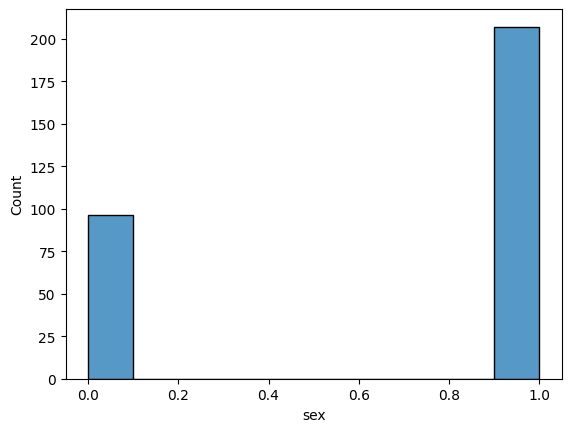

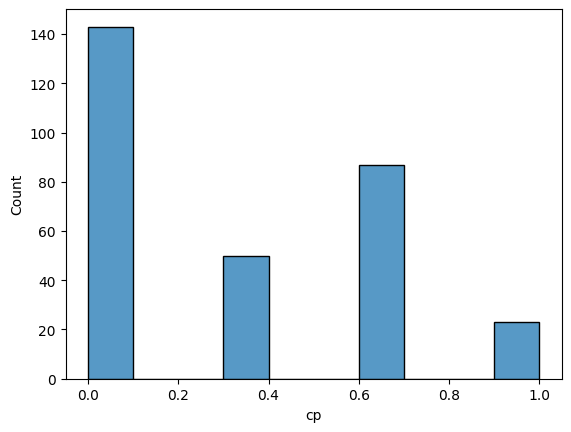

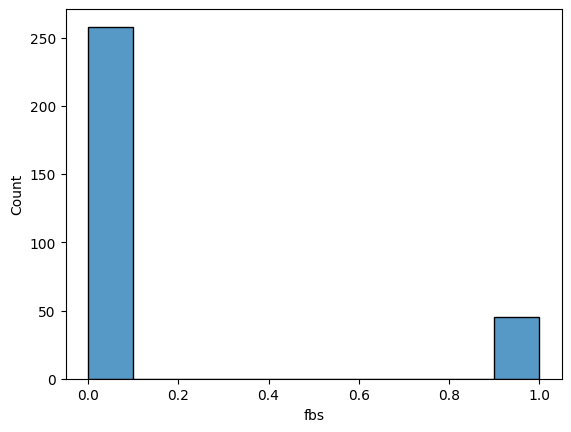

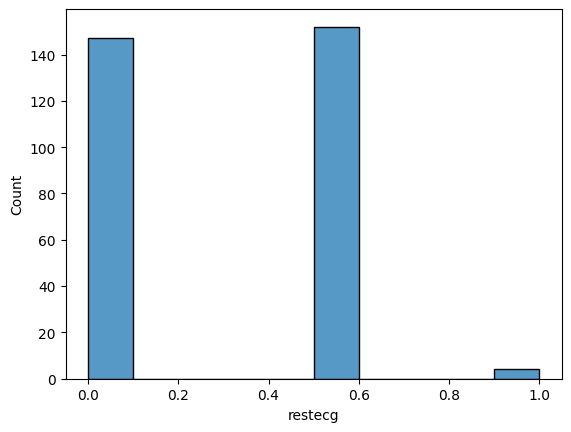

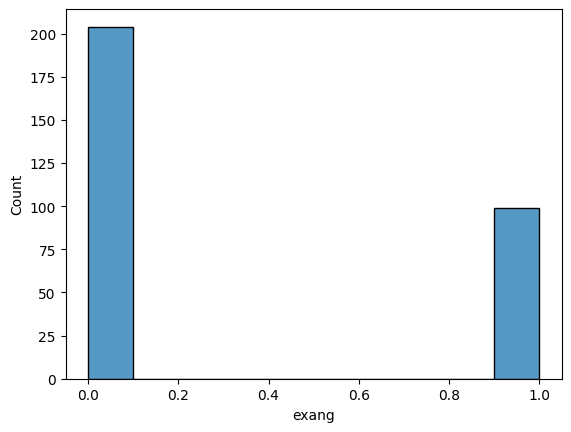

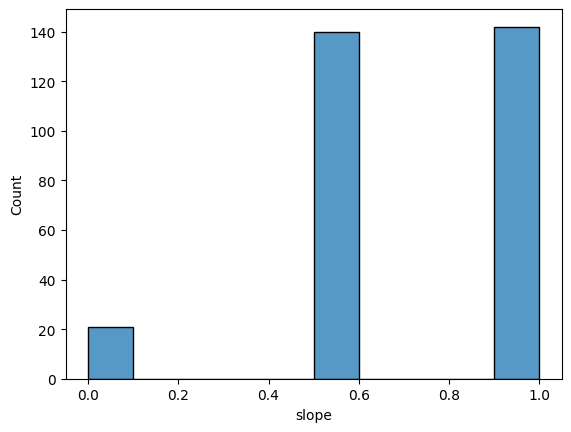

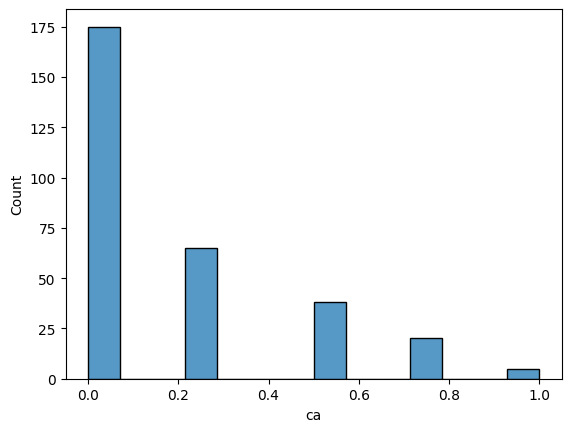

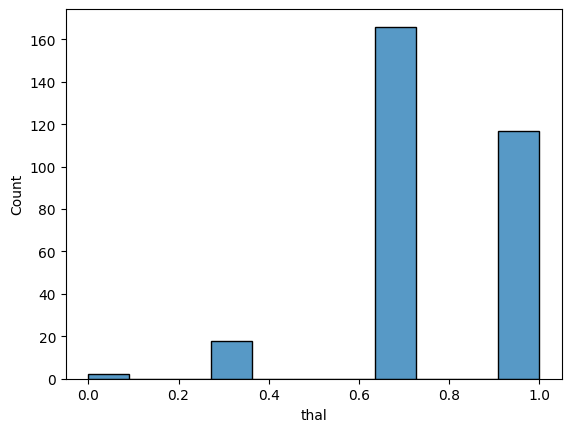

In [19]:
# transformation pipeline for categorical data
categorical_transformed = pd.DataFrame(data = categoric_pipe.fit_transform(data[categorical_cols]), columns=categorical_cols)
for feature in categorical_transformed.columns:
    plt.figure() 
    sns.histplot(data=categorical_transformed, x=feature)  

In [21]:
ct = ColumnTransformer(
    [("numeric", numeric_pipe, numerical_cols),
     ("categorical", categoric_pipe, categorical_cols)]
)
transformed = ct.fit_transform(data)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [24]:
model_pipeline = Pipeline(steps=[
        ("preprocessing",ct),
        ("model", model)]
)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [26]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('missing '
                                                                   'steps',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler()),
                                                                  ('normalization',
                                                                   PowerTransformer())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('categorical',
                                                  Pipeline(steps=[('missing '
                                                                   'steps',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model', RandomForestClassifier(random_state=0))])

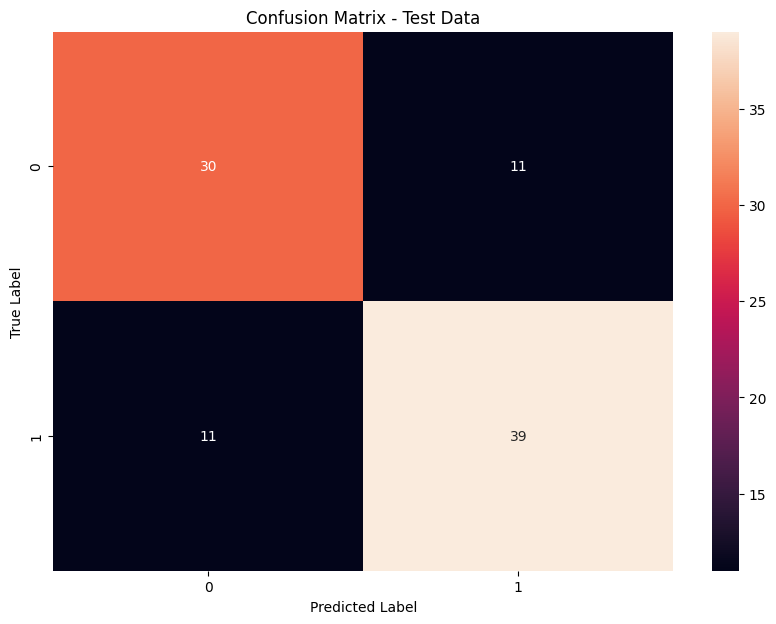

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [28]:
model_output = model_pipeline.predict(X_test)
cm = confusion_matrix(y_test, model_output)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test,model_output))